In [2]:
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
sns.set()

## Products Datasets

In [3]:
products = pd.read_csv("products.csv",converters={"tags": literal_eval})
products.head()

,product_id,title,tags,creation_date,price,weight,express_delivery,category,minimum_quantity,print_count_product,view_count_product,cart_count_product,order_count_product
0,101,Jogo Banheiro de Crochê de 3 Peças,"[#jogobanheiro #croche #tapetes, decoração, na...",2022-09-25 13:43:36,110.0,1.0,1,Técnicas de Artesanato,1,11,0,0,0
1,106,Guardanapos de Tecido - 100 unidades,"[guardanapos de tecido, guradanapo, festa, eve...",2014-12-26 18:47:48,269.5,0.0,0,Casa,1,62,6,0,0
2,47,Toalha Papai Noel,"[natal, toalha de natal, toalha de mesa, papai...",2013-11-06 20:43:27,291.1,0.0,0,Casa,1,423,4,0,0
3,8589941942,Caixa para 1 bis feliz natal cliente como você...,"[lembrança, personalizados, festa, caixas, cai...",2021-11-22 15:02:30,45.0,0.0,0,Lembrancinhas,30,2746,93,6,2
4,17179869192,Árvore de Natal decorada em MDF,"[#madajoartesanato, #decoraçaodenatal, #enfeit...",2020-12-18 18:52:35,100.0,0.0,0,Decoração,1,1010,4,0,0


In [4]:
products.groupby(['express_delivery']).size().reset_index(name='counts')

,express_delivery,counts
0,0,63302
1,1,13468


In [5]:
print("Categorias Únicas =",len(products["category"].unique()))

Categorias Únicas = 42


In [6]:
products.groupby(['category']).size().reset_index(name='counts').sort_values("counts",ascending=False)

,category,counts
24,Lembrancinhas,18709
1,Aniversário e Festas,11119
14,Decoração,10588
4,Bebê,6112
28,Papel e Cia,5294
11,Casamento,4448
10,Casa,3822
35,Roupas,3401
21,Infantil,2290
13,Convites,1894


In [7]:
def cdf(df, col):
    aux_ecdf = ECDF(df[col])
    plt.plot(aux_ecdf.x,aux_ecdf.y,label="Price",color="b",linewidth=2)
    plt.title(col)
    plt.show()
    

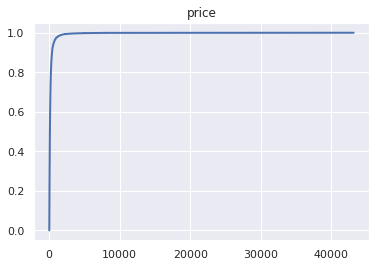

In [8]:
cdf(products,"price")

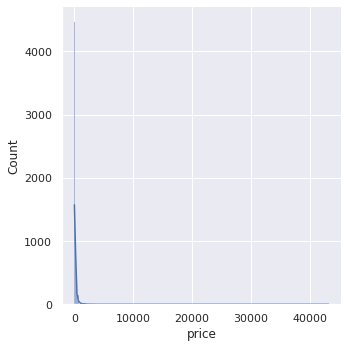

In [29]:
sns.displot(products["price"],kde=True)

In [10]:
# qual o preço do produto mais caro?
max(products["price"])

43150.0

In [11]:
# qual o produto mais caro?
products[products["price"]==43150]

,product_id,title,tags,creation_date,price,weight,express_delivery,category,minimum_quantity,print_count_product,view_count_product,cart_count_product,order_count_product
49740,17179882988,Cartão de visita,[cartão de visita],2022-02-27 08:54:43,43150.0,0.0,0,Convites,500,14,1,0,0


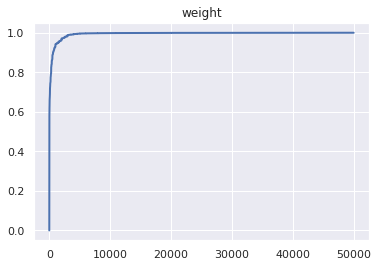

In [12]:
cdf(products,"weight")

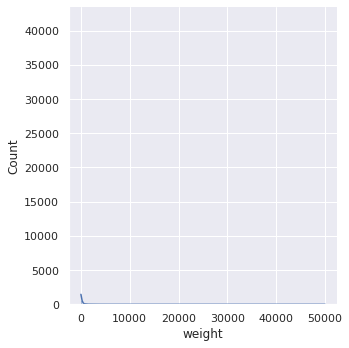

In [33]:
sns.displot(products["weight"],kde=True)
plt.show()

In [13]:
max(products["weight"])

50000.0

In [14]:
products[products["weight"]==50000]

,product_id,title,tags,creation_date,price,weight,express_delivery,category,minimum_quantity,print_count_product,view_count_product,cart_count_product,order_count_product
3260,8589947023,Cama Montessori Com Grades Duplas Solteiro Eco,[cgds],2017-11-24 20:56:54,999.9,50000.0,0,Infantil,1,4867,90,2,1
7352,17179876573,Cama Infantil Montessoriana,"[kids, reciclavel, sustentavel, infantil, deco...",2019-02-27 16:49:11,1450.0,50000.0,0,Infantil,1,15153,196,1,0
18595,8589938295,Cama Montessoriana Solteiro Envernizada Eco,[csm],2017-11-24 21:12:57,899.9,50000.0,0,Infantil,1,15023,193,2,0
24904,8589940622,Cama Montessoriana Oca Solteiro Eco,"[cmos, cama oca, cama solteiro, cama infantil,...",2018-11-22 22:18:05,999.9,50000.0,0,Infantil,1,14504,107,2,1
26274,25769811127,Espelho Decorativo Amadeirado Antíqua Lindo 18...,"[espelho decorativo, espelho chanfrado, espelh...",2020-06-29 11:59:11,1199.0,50000.0,0,Decoração,1,564,30,2,0
26960,17179885193,gaveteiro closet porta joias e acessórios luxo...,"[armário, gaveteiro, closet, porta-joias, luxo...",2021-10-08 09:04:35,2499.0,50000.0,0,Decoração,1,1617,105,2,0
45896,8589951074,Cama Jardim Encantado Solteiro,"[cama jardim, cama solteiro, cama infantil, ca...",2022-05-05 20:58:49,1350.0,50000.0,0,Infantil,1,554,44,0,0


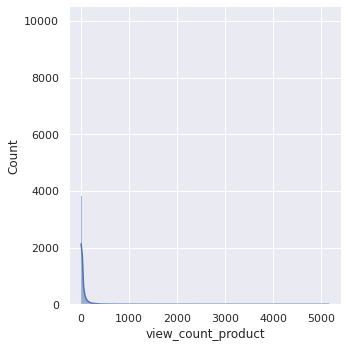

In [31]:
sns.displot(products["view_count_product"],kde=True)

#### Wordcloud

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk

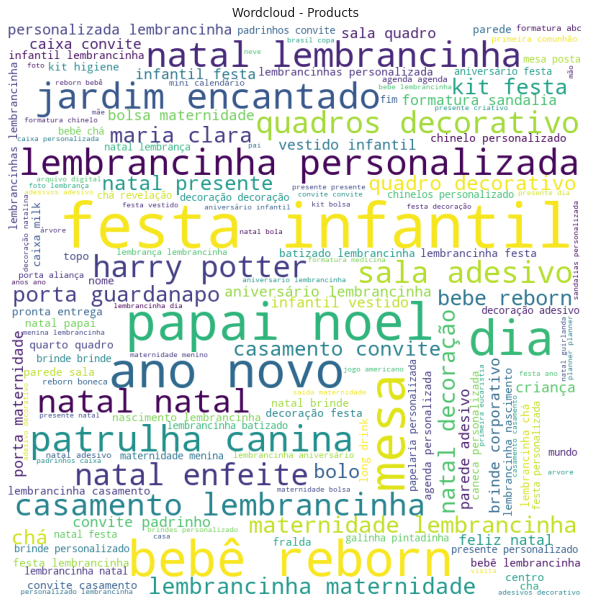

In [50]:
stopwords = nltk.corpus.stopwords.words('portuguese')
 
all_words = ''

for tags in products["tags"]:
     
    val = ""
    for t in tags:
        val = val + t + " "
    val.replace('#', '')
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    all_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud - Products")
 
plt.show()

## Pairs

In [15]:
pairs = pd.read_csv("pairs.csv")
pairs.head()

,pair_id,product_id,query,search_position,print_count_query,view_count_query,cart_count_query,order_count_query
0,8589934593,14817,Convite Padrinhos Batismo,319,2374,18,1,0
1,8589934636,14884,Decoracao De Casamento,254,388,1,0,0
2,8589934836,8589934668,Toalha De Lavabo,233,219,2,0,0
3,8589934727,17179884005,Calendario 2023 Editavel,40,4871,2,0,0
4,8589934934,25769803777,Ecobag,286,166,3,0,0
